In [11]:
# To begin the analysis, I imported the necessary libraries and loaded the dataset into my project. This was a crucial first step to get everything set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("gym_members_exercise_tracking.csv")

# Display the first few rows and basic information about the dataset
print(data.head())
print(data.info())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [13]:
# Let's start by handling missing values, encoding categorical variables, and scaling the numerical data.
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables (Gender, Workout_Type)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Workout_Type'] = label_encoder.fit_transform(data['Workout_Type'])

# Scale numerical features (Weight, Height, etc.)
scaler = StandardScaler()
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                   'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 
                   'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Show the preprocessed data
data.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,1.422343,1,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,3,-1.978321,1.455967,0.743295,3,0.794278
1,0.600965,0,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1,1.426301,-0.877898,0.743295,2,1.064652
2,-0.548964,0,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,0,1.346380,-0.544488,0.743295,2,-0.030361
3,-1.123928,1,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,2,0.611110,-0.877898,-0.352502,1,-0.976669
4,-0.056137,1,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,2,0.675047,0.289035,-0.352502,1,-1.580503


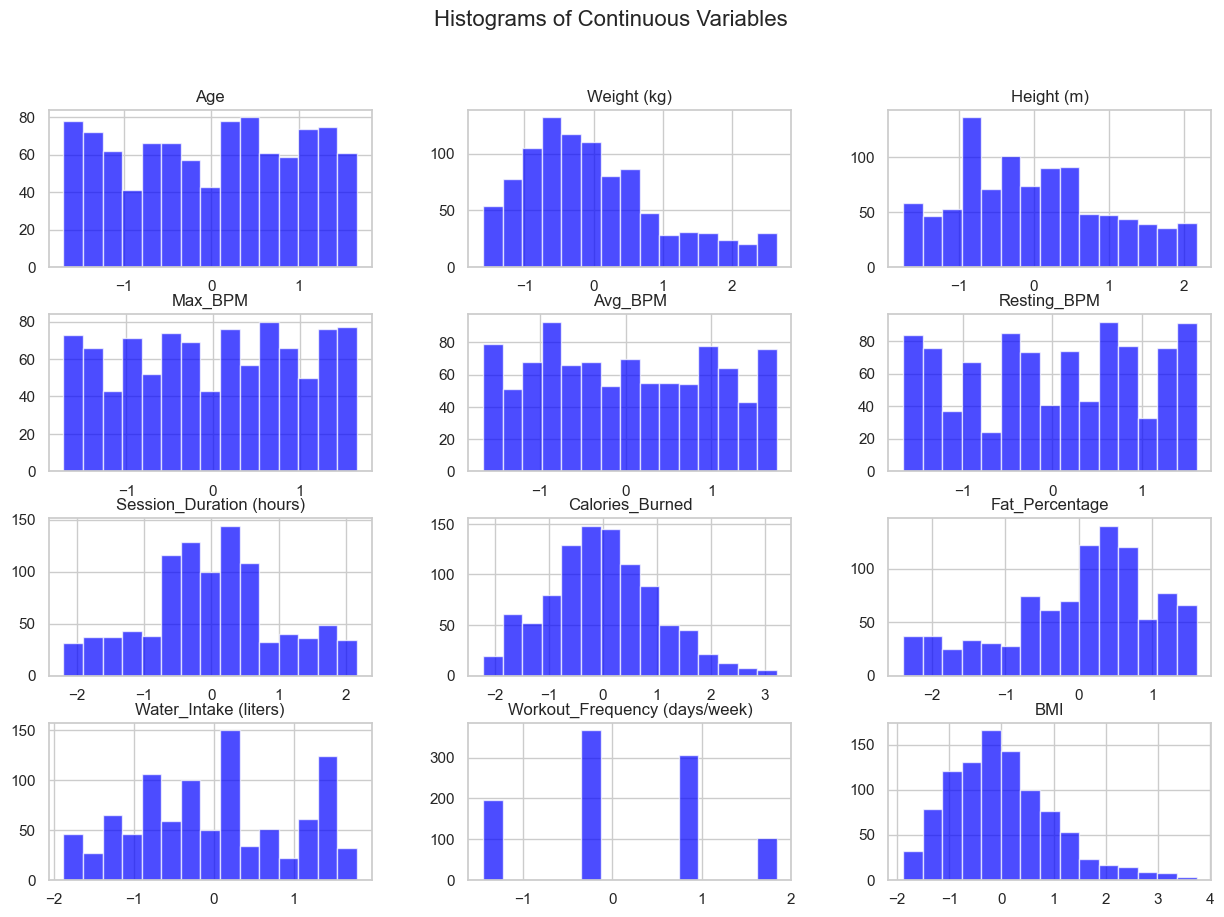

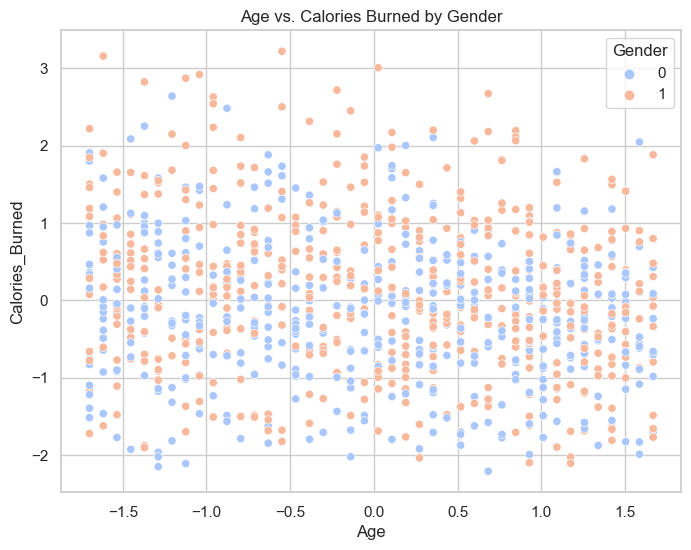

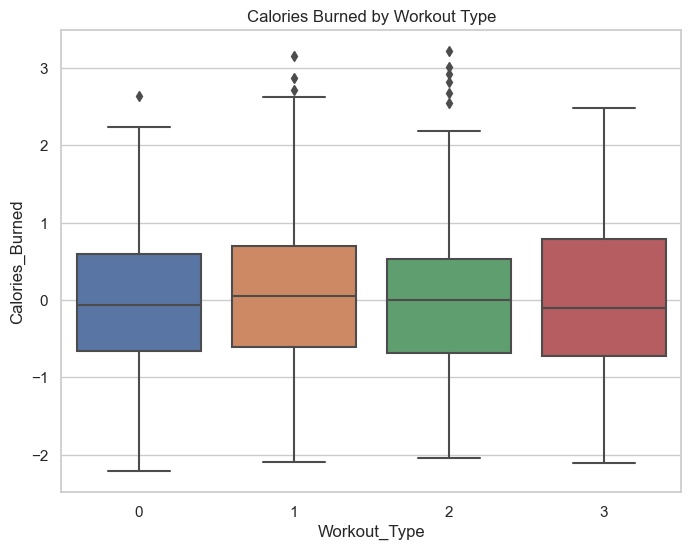

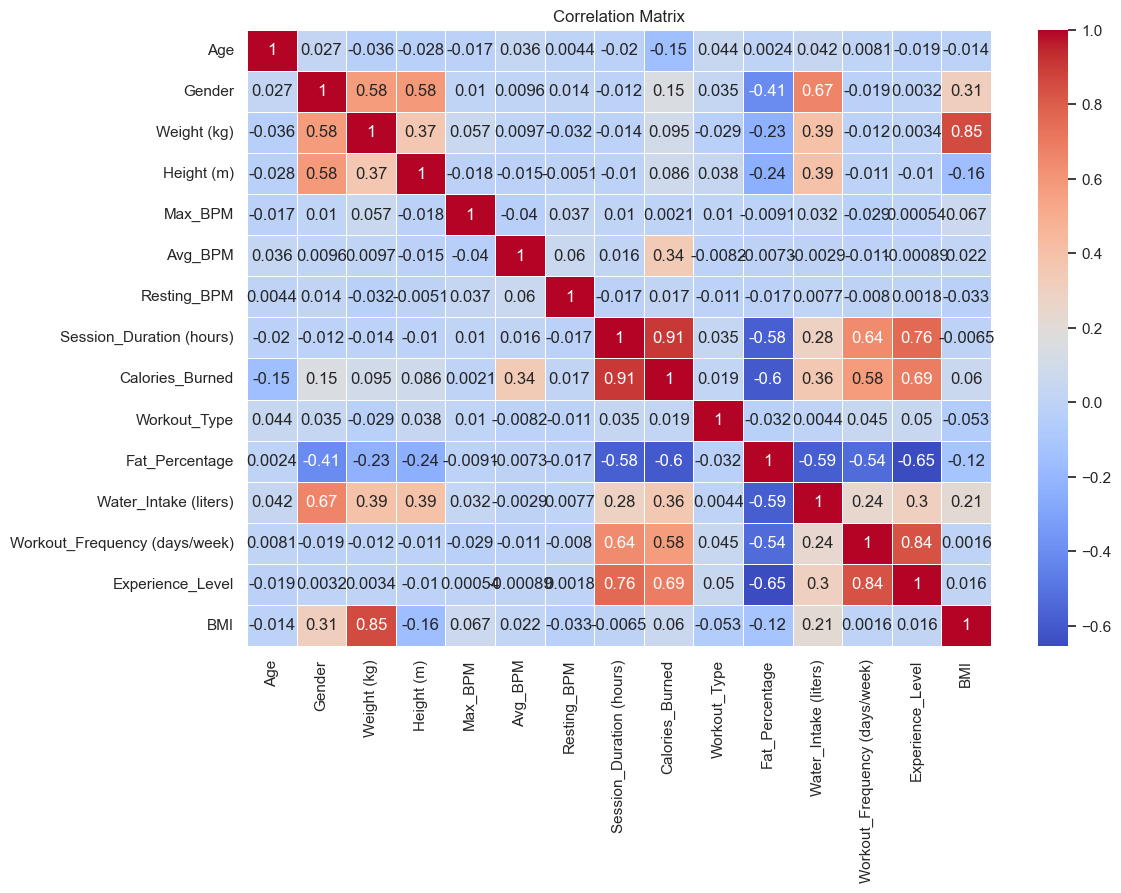

In [14]:
# In this part, I will conduct exploratory data analysis (EDA) to understand the dataset and visualise the main patterns and relationships.
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual style
sns.set(style="whitegrid")

# Plot histograms for continuous variables to check their distribution
data[numeric_columns].hist(bins=15, figsize=(15,10), color='blue', alpha=0.7)
plt.suptitle("Histograms of Continuous Variables", fontsize=16)
plt.show()

# Scatter plot between 'Age' and 'Calories_Burned' to see any potential relationships
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Calories_Burned', data=data, hue='Gender', palette="coolwarm")
plt.title("Age vs. Calories Burned by Gender")
plt.show()

# Boxplot to see the distribution of calories burned across different workout types
plt.figure(figsize=(8,6))
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=data)
plt.title("Calories Burned by Workout Type")
plt.show()

# Correlation heatmap to see how different variables are correlated
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [15]:
from sklearn.decomposition import PCA

# Identify feature importance (using correlation matrix, Random Forest, etc.)
# For simplicity, I'll use correlation matrix from the above EDA step.

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Reducing to 5 dimensions for simplicity
principal_components = pca.fit_transform(data[numeric_columns])

# Add the principal components back into the dataset for later classification
pca_columns = [f"PC{i+1}" for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Show variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each PC: {explained_variance}")

# Display the first few rows of the new PCA dataset
pca_df.head()


Explained Variance by each PC: [0.27580572 0.16769923 0.10684248 0.0925165  0.08660536]


,PC1,PC2,PC3,PC4,PC5
0,3.239336,0.352747,-0.356353,-0.408726,1.269704
1,-0.709972,-0.204556,-2.204475,-0.162289,0.522445
2,-1.348161,-0.295355,-0.096182,1.796049,0.697940
3,-2.454154,-0.513185,0.047558,-0.697042,-0.785375
4,-2.070693,-0.698392,1.444877,-1.345500,-0.806058


In [16]:
# Now, let's implement basic classification techniques such as Logistic Regression and Decision Trees.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Splitting the dataset
X = pca_df  # Using the principal components as features
y = data['Experience_Level']  # Predicting experience level

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')

print(f"Logistic Regression - Accuracy: {accuracy_logreg}, Precision: {precision_logreg}, Recall: {recall_logreg}")


Logistic Regression - Accuracy: 0.8358974358974359, Precision: 0.86244996899487, Recall: 0.8573626373626374


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree, average='macro')
recall_dtree = recall_score(y_test, y_pred_dtree, average='macro')

print(f"Decision Tree - Accuracy: {accuracy_dtree}, Precision: {precision_dtree}, Recall: {recall_dtree}")


Decision Tree - Accuracy: 0.7743589743589744, Precision: 0.8106136540817462, Recall: 0.8007081807081807


In [18]:
# Next, I'll explore advanced models such as Random Forest and Support Vector Machines (SVM).

from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')

print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}")



Random Forest - Accuracy: 0.8358974358974359, Precision: 0.8626471241394625, Recall: 0.8535286935286935


In [19]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')

print(f"SVM - Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}")


SVM - Accuracy: 0.8256410256410256, Precision: 0.8489106714167675, Recall: 0.8523076923076923


Cross-validation scores: [0.81410256 0.80128205 0.78205128 0.75483871 0.76774194]
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.79      0.81        78
           2       0.77      0.81      0.79        75
           3       1.00      0.95      0.98        42

    accuracy                           0.84       195
   macro avg       0.86      0.85      0.86       195
weighted avg       0.84      0.84      0.84       195



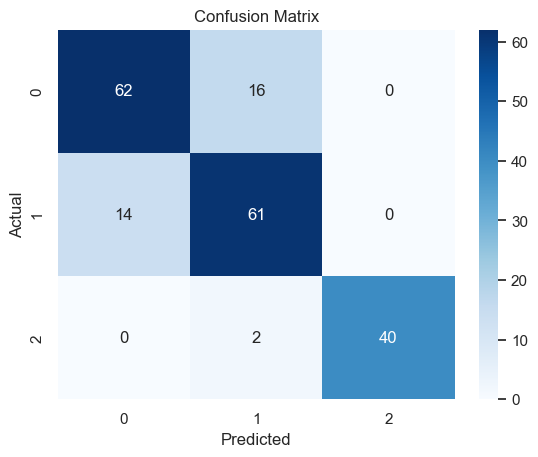

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

# Define a function to evaluate the models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Evaluate Random Forest as an example
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

